# Titanic Prediction

# Data understanding



1.   Define the question
Build a model to predict who is most likely to survive the titanic sinking
2.   Metrics of Success
The project will be considered successful if we are able to build a KNN classifier with a high accuracy greater than 80%
3.   Understanding the context
Titanic was amont the best ocean liners in the 1912. On its maiden voyage on 15th april 1912 it hit an iceberg leading to deaths of more than 1500 of 2240 passengers and crew on board

4.   Experimental design
The following steps will be followed during this exercise:


    *   Data Understanding
    *   Data Preparation
    *   Data Cleaning
    *   Perform EDA
    *   Modelling with KNN
    *   Evaluation
    *   Challenging the solution
5.   Data relevance
    *   PassengerID: passenger's unique ID.
    *   Survived(On train): whether a passenger survived(1) or not(0).
    *   Pclass: Train class(1st, 2nd or 3rd)
    *   Name: Passenger's name.
    *   Sex: Passenger's sex.
    *   Age: Passenger's age.(It is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
    *   SibSp: Number of siblings or spouse on board the Titanic. It defines family relations in this way:
      *   Sibling = brother, sister, stepbrother, stepsister
      *   Spouse = husband, wife (mistresses and fiancés were ignored)
    *   Parch: Number of parents or children on board the Titanic. It defines family relations in this way:
      *   Parent = mother, father
      *   Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
    *  Ticket: Ticket Number.
Fare: Passenger fare.
    *   Cabin: Cabin number.
    *   Embarked: Point of Embarkation(C = Cherbourg, Q = Queenstown or S = Southampton)

# Data Preparation

In [5]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [6]:
#Read Datasets
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

In [7]:
#viewing our data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#Reading data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [12]:
print(train['PassengerId'].nunique())
print(test['PassengerId'].nunique())

891
418


In [13]:
#since Passenger ID is unique we set it as our index
train =train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Our datasets have appropriate datatypes

## Data Cleaning

In [16]:
#previewing column names
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [17]:
#Change column names to lowercase

train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

# preview to confirm conversion
print(train.columns)
print(test.columns)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


Check for missing values

In [18]:
print(train.isna().sum())
print('\n******************\n')
print(train.isna().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

******************

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


Our data has a lot of missing values on the age and cabin columns and dropping it will lead to lose of a lot of data. hence we will only drop the embarked and fare missing values 

In [19]:
#dropping embarked missing values in the train and test datasets

train = train.dropna(subset=['embarked'])
test = test.dropna(subset=['embarked'])
test = test.dropna(subset = ['fare'])

boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


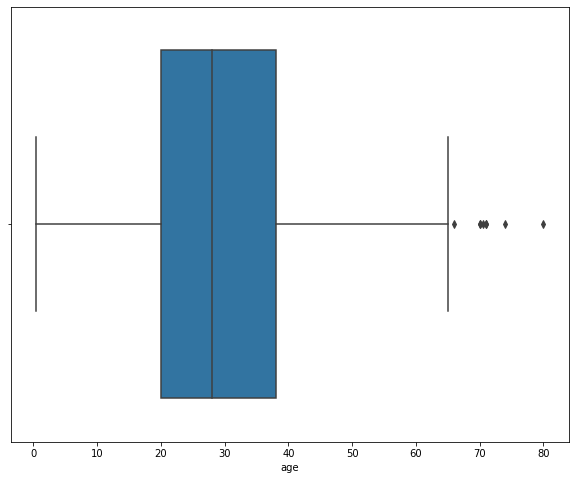

In [20]:
# Boxplot for age in train dataset

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(train.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


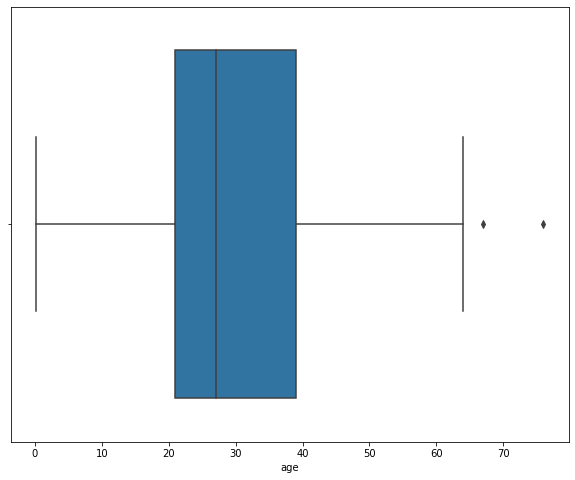

In [21]:
# Boxplot for age in test dataset

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(test.age)

In [22]:
#impute the mean of age column
train['age'].fillna(train["age"].mean(), inplace=True)
test['age'].fillna(test["age"].mean(), inplace=True)

#check for missing values
print(train.isna().sum())
print(test.isna().sum())

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
dtype: int64
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       326
embarked      0
dtype: int64


Both cabin and pclass gives us information about the passenger social class hence we can drop it

In [23]:
#drop cabin column 
train.drop(['cabin'],axis=1)
test.drop(['cabin'],axis=1)


,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.181269,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S


Check for duplicates

In [24]:
#Check duplicated data
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


There are no duplicates

### Feature Engineering

In [25]:
#Lets find the size of family individuals had from the number of siblings they had onboard
#we will add 1 to account for the individual
train['family_size'] = train['sibsp'] + train['parch'] + 1
test['family_size'] = test['sibsp'] + test['parch'] + 1

In [26]:
#The embarktion destination is ininitial. we will have to convert it to their full names

train['embarked'] = train['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])
test['embarked'] = test['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])

In [27]:
#drop irrelevant columns
train = train.drop(['name', 'sibsp', 'parch', 'cabin', 'ticket'], axis = 1)
test = test.drop(['name', 'sibsp', 'parch', 'cabin', 'ticket'],axis = 1)

In [28]:
#preview our data
train.head(3)

,survived,pclass,sex,age,fare,embarked,family_size
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,Southampton,2
2,1,1,female,38.0,71.2833,Cherbough,2
3,1,3,female,26.0,7.9250,Southampton,1


In [29]:
test.head(3)

,pclass,sex,age,fare,embarked,family_size
PassengerId,,,,,,
892,3,male,34.5,7.8292,Queenstown,1
893,3,female,47.0,7.0000,Southampton,2
894,2,male,62.0,9.6875,Queenstown,1


# Exploratory Data Analysis

### Univarite analysis

Measure of central tendancy

In [30]:
#Merge the two dataframes into one

df = pd.concat([train,test],sort=False)
df.shape

(1306, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    float64
 1   pclass       1306 non-null   int64  
 2   sex          1306 non-null   object 
 3   age          1306 non-null   float64
 4   fare         1306 non-null   float64
 5   embarked     1306 non-null   object 
 6   family_size  1306 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 81.6+ KB


In [32]:
df.head(3)

,survived,pclass,sex,age,fare,embarked,family_size
PassengerId,,,,,,,
1,0.0,3,male,22.0,7.2500,Southampton,2
2,1.0,1,female,38.0,71.2833,Cherbough,2
3,1.0,3,female,26.0,7.9250,Southampton,1


In [33]:
#Impute null values in survived column
df['survived'] = df['survived'].fillna(0)

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
family_size    0
dtype: int64

In [34]:
#Print all summary of univariate

#define our features to summarize
df_sum = df[['survived','pclass','age','fare','family_size']]

#define function

def sum_func(df):
  disp_df= pd.DataFrame(columns=['nunique_values','mean','mode','min','25%','50%(median)','75%','100%(max)','std_dev','kurt','skew','count'])

  for col in df:
    disp_df.loc[col] = [df_sum[col].nunique(), df_sum[col].mean(),df_sum[col].mode().values[0],df_sum[col].min(),df_sum[col].quantile(0.25),df_sum[col].median(),df_sum[col].quantile(0.75),df_sum[col].max(),df_sum[col].std(),df_sum[col].kurt(),df_sum[col].skew(),df_sum[col].count()]
  return disp_df

sum_func(df_sum)

,nunique_values,mean,mode,min,25%,50%(median),75%,100%(max),std_dev,kurt,skew,count
survived,2.0,0.260337,0.000000,0.00,0.0000,0.000000,1.000,1.0000,0.438987,-0.805346,1.093567,1306.0
pclass,3.0,2.296325,3.000000,1.00,2.0000,3.000000,3.000,3.0000,0.837037,-1.309761,-0.601703,1306.0
age,99.0,29.814249,29.642093,0.17,22.0000,29.642093,35.000,80.0000,12.837757,0.957832,0.454872,1306.0
fare,280.0,33.223956,8.050000,0.00,7.8958,14.454200,31.275,512.3292,51.765986,27.080437,4.375582,1306.0
family_size,9.0,1.885911,1.000000,1.00,1.0000,1.000000,2.000,11.0000,1.584891,10.272970,2.849429,1306.0


The size of the dataset is 1306.
The survived has a mode of 0 suggesting most people did not survive

The mean of pclass is almost 3 surgesting most people were of class 3 hence why most dis not survive the median,75% can confirm this.




Plotting

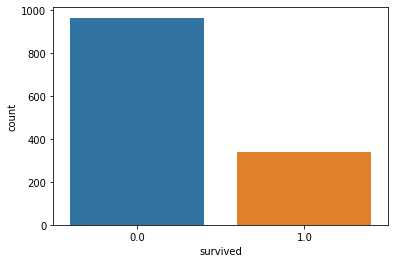

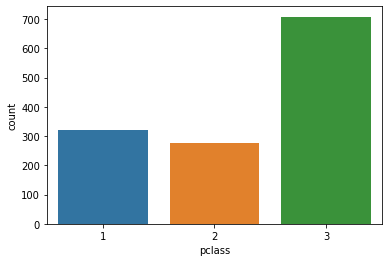

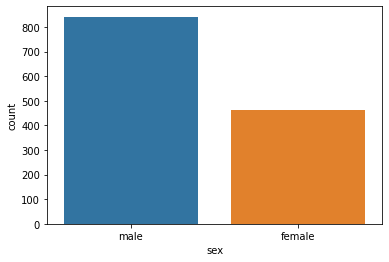

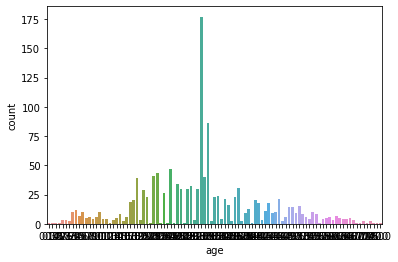

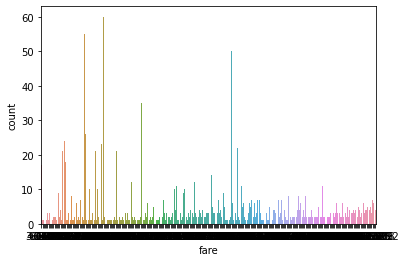

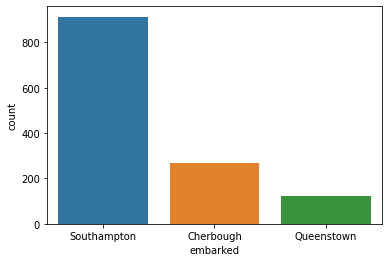

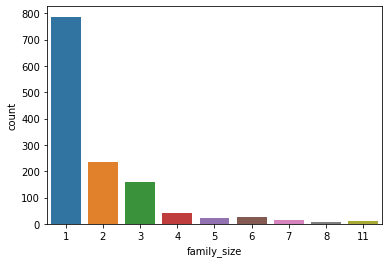

In [35]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

observation


---


Most of the passengers did not survive the crash.

The highest number of passengers were from the third class

There were more males than females

Prefered destination by most passangers were at Southhampton and least was Queenstown

Most passangers did not have siblings onboard

Bivariate Analysis

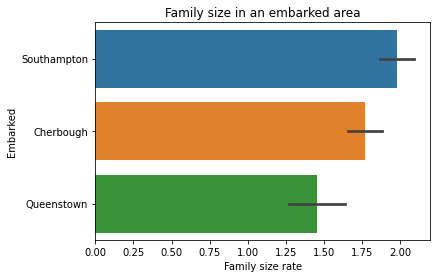

In [36]:
# Plotting the family size vs destination
#
df_2 = df.groupby('embarked').mean()

sns.barplot(x=df['family_size'], y=df['embarked'], data=df_2)
plt.xlabel('Family size rate')
plt.ylabel('Embarked')
plt.title('Family size in an embarked area')
plt.show()

Southampton had the highest number family members visiting

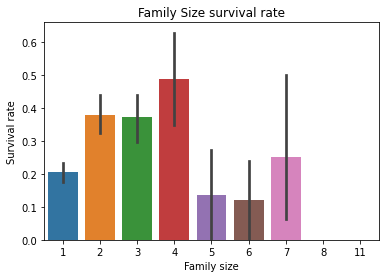

In [37]:
# Plotting the survival rate vs family size
#
df_3 = df.groupby('survived').count()

sns.barplot(x=df['family_size'], y=df['survived'], data=df_3)
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.title('Family Size survival rate')
plt.show()

The highestsurvival rate was for the family with the the size of 4

Correlation

In [38]:
# Check for correlation
#
correlation = df_sum.corr()
correlation

,survived,pclass,age,fare,family_size
survived,1.000000,-0.241388,-0.064694,0.171809,0.021797
pclass,-0.241388,1.000000,-0.366791,-0.557861,0.049186
age,-0.064694,-0.366791,1.000000,0.170259,-0.195598
fare,0.171809,-0.557861,0.170259,1.000000,0.227461
family_size,0.021797,0.049186,-0.195598,0.227461,1.000000


Heatmap

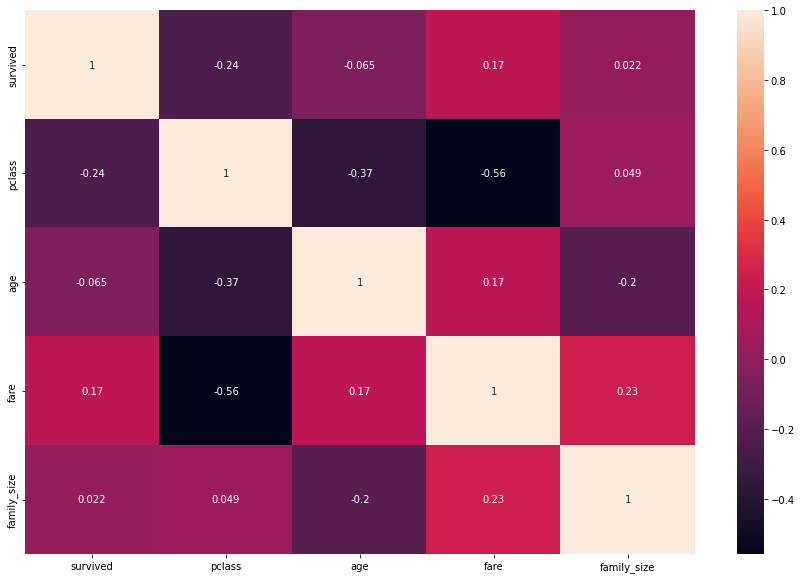

In [39]:
#heatmap
plt.figure(figsize = (15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

The correlation between the columns are not very high

Multivariate Analysis

In [40]:
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,survived,pclass,age,fare,family_size
survived,1.095164,0.305121,0.194087,-0.053551,0.011265
pclass,0.305121,1.754416,0.471468,0.892360,-0.203702
age,0.194087,0.471468,1.233916,-0.030665,0.220906
fare,-0.053551,0.892360,-0.030665,1.606431,-0.414123
family_size,0.011265,-0.203702,0.220906,-0.414123,1.147179


Modelling

In [41]:
#Select target and predict variables

X = train.drop(['survived'],axis=1)
y = train['survived']

# One hot encoding our data for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting our dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

# Apply Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting the data in a logistic regression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

# Predicting classification using the test set
y_predict = regressor.predict(X_test)

# Getting the metrics for the model
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[85 20]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       105
           1       0.68      0.59      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



f1 score: 77%
model accuracy: 72%

## K Nearest Neighbours(KNN)

In [42]:
#Define predictor and target variables
X = train.drop(['survived'],axis=1)
y = train['survived']

#Standardize data
sc = StandardScaler()
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])

#Encoding 
X = pd.get_dummies(X, drop_first=True)

#splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

#applying KNeighbours
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
# Predict new values using the test set
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100  15]
 [ 13  50]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       115
           1       0.77      0.79      0.78        63

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



Precision score: 88%
there is a rise from 77%

Accuracy score: 84%
there is a rise from 72%


Hyperparameter tuning

In [44]:
#  Defining the hyper parameters for the Knearest Neighbors Classifier
#
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']

# Creating a dictionary to store our parameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)



In [45]:
#Apply grid search
classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [47]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1,

In [48]:
clf.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 17, 'p': 1}

In [49]:
classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=18,p=1,metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')

In [50]:
#Predicting values using our test set
y_predict = classifier.predict(X_test)

# Printing out the metrics for assessing the model's perfromance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100  15]
 [ 13  50]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       115
           1       0.77      0.79      0.78        63

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



In [51]:
# Defining the list of test sizes we will use for the assessment
#
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

# Using a for loop to split the dataset, fit it with the optimal parameters then get the accuracy score.
#
for test in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 12)
    
    # Fitting to the classifier
    classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=29,p=1,metric='manhattan')
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    print("Test size {} has accuracy score:".format(test), (metrics.accuracy_score(y_test, y_pred)*100))

Test size 0.1 has accuracy score: 87.64044943820225
Test size 0.2 has accuracy score: 83.14606741573034
Test size 0.3 has accuracy score: 82.02247191011236
Test size 0.4 has accuracy score: 79.7752808988764
Test size 0.5 has accuracy score: 77.07865168539327


A test of 10% has a higher accuraccy

Challenging the solution

In [53]:
#use random forest
X = train.drop(['survived'],axis=1)
y = train['survived']

# Standardizing
scaler = StandardScaler()
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])

#encoding
X = pd.get_dummies(X, drop_first=True)

# Splitting our dataset into the test and train 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [54]:
# Fitting the model in our data
forest  = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=5,max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
y_pred = forest.predict(X_test)

#metrics
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[48  6]
 [13 22]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.79      0.63      0.70        35

    accuracy                           0.79        89
   macro avg       0.79      0.76      0.77        89
weighted avg       0.79      0.79      0.78        89



our model is okay to use

Conclusion


---


We can see that someone from first class, who's female and boarded in Cherbough had a higher chance of survival. Or someonee who fulfills any of those filters had a higher chance of survival as compared to someone who doesn't fit into any of these categories.